In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#cleaning data

df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  bool   
 10  INLAND              20640 non-null  bool   
 11  ISLAND              20640 non-null  bool   
 12  NEAR BAY            20640 non-null  bool   
 13  NEAR OCEAN          20640 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 1.5 MB


In [4]:
df.iloc[:, 10:14] = df.iloc[:, 10:14].astype(int)
df.head()

/tmp/ipykernel_18/1870641012.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: INLAND, Length: 20640, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 10:14] = df.iloc[:, 10:14].astype(int)
/tmp/ipykernel_18/1870641012.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: ISLAND, Length: 20640, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 10:14] = df.iloc[:, 10:14].astype(int)
/tmp/ipykernel_18/1870641012.py:1: FutureWarning: Setting an item of incompatible dtype is

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,0,0,1,0


<Axes: >

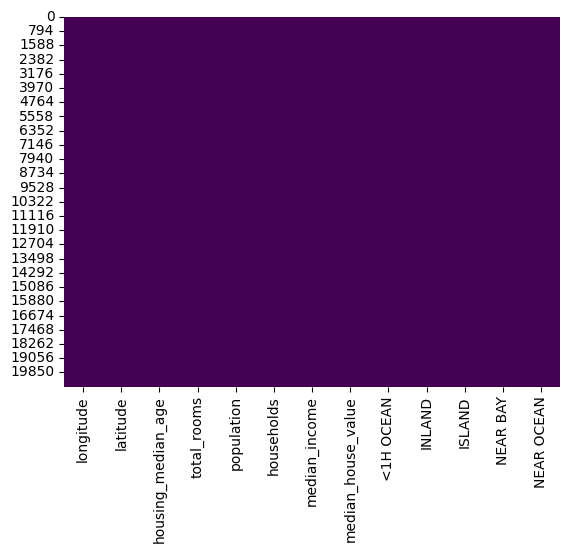

In [5]:
df = df.dropna (axis=1)
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'INLAND'}>],
       [<Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>]], dtype=object)

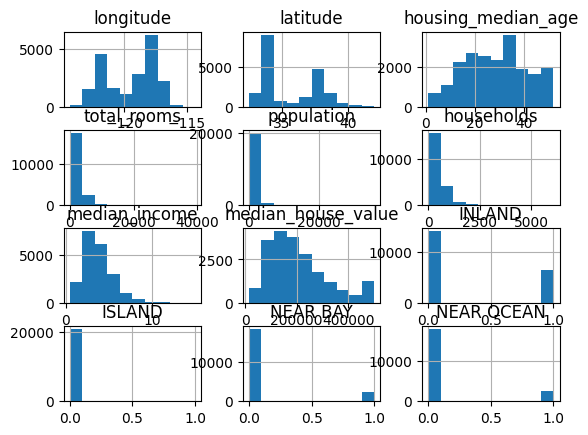

In [6]:
##data exploration

df.hist()

<Axes: >

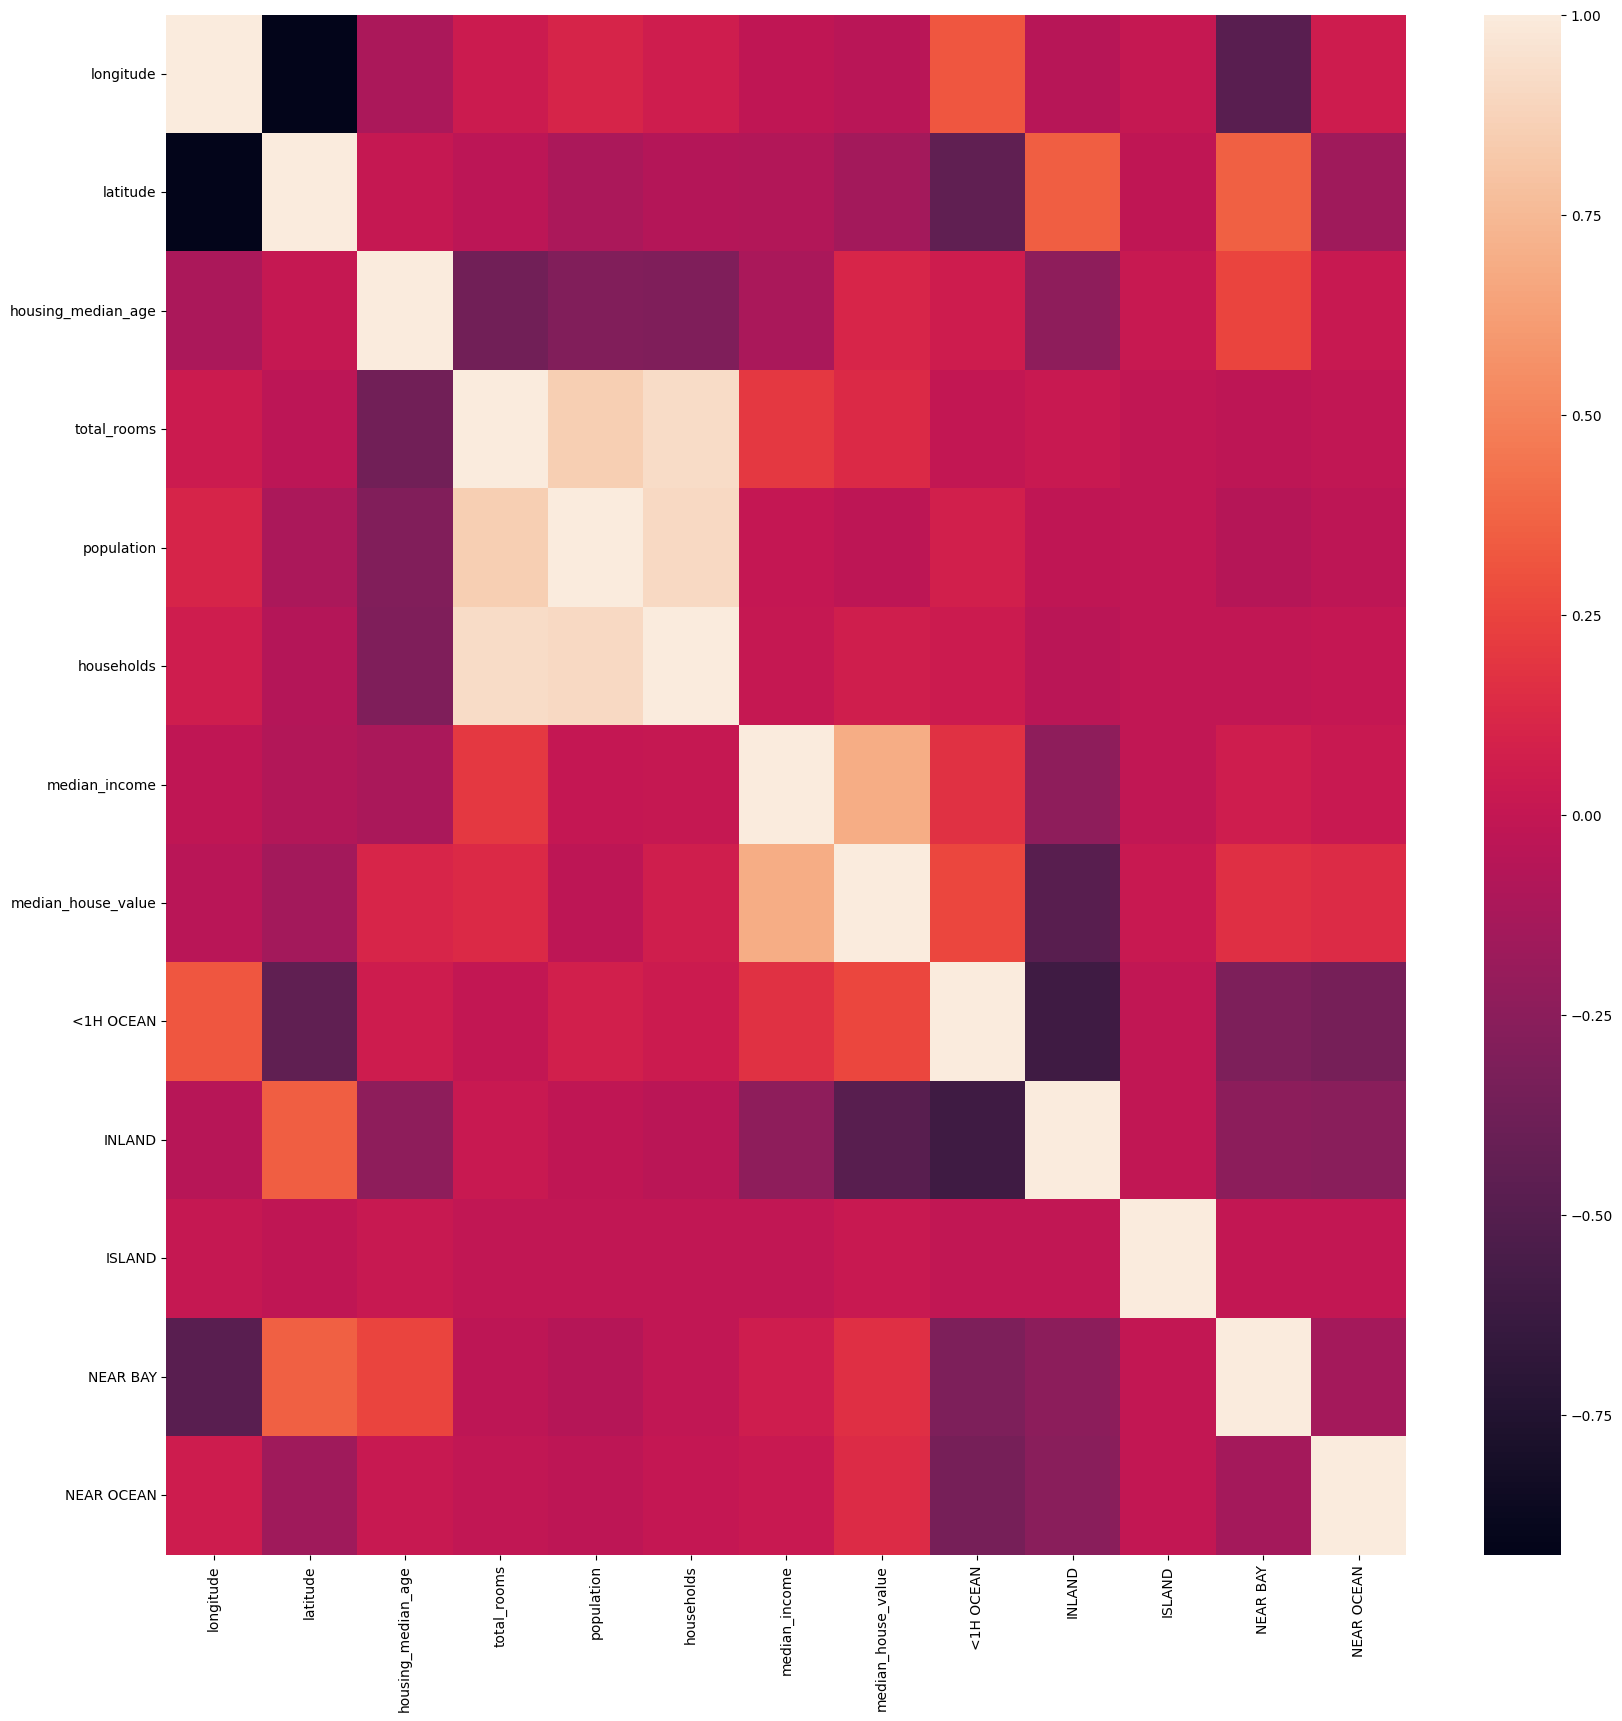

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [8]:
#splitting data

from sklearn.model_selection import train_test_split

x= df.drop(['median_house_value'], axis =1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
y_train

9872     133100.0
6757     292900.0
4853     187500.0
7873     179500.0
15756    335700.0
           ...   
11467    268800.0
1877     104200.0
15233    500001.0
2214     213900.0
12998    276100.0
Name: median_house_value, Length: 16512, dtype: float64

In [9]:
#standardising the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_trains = scaler.fit_transform(x_train)
x_tests =scaler.fit_transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.04966085271317829

In [11]:
from sklearn.linear_model import LinearRegression

lir=LinearRegression()
lir.fit(x_trains, y_train)
lir.score(x_tests, y_test)

0.6438140226621885

In [12]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1)
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.8226519280474949